In [2]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
import matplotlib as mpl


**importing the csv files

In [3]:
data_accepted = pd.read_csv("accepted_2007_to_2018q4.csv", low_memory=False)

In [67]:
# To display the entire rows without truncation
pd.set_option('display.max_rows', 100)

# Data analysis

In [13]:
df_accepted = data_accepted

In [12]:
df_rejected = data_rejected

NameError: name 'data_rejected' is not defined

In [1]:
df_accepted.shape

NameError: name 'df_accepted' is not defined

In [10]:
df_rejected.shape

(27648741, 9)

In [13]:
df_accepted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


In [14]:
df_rejected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27648741 entries, 0 to 27648740
Data columns (total 9 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Amount Requested      float64
 1   Application Date      object 
 2   Loan Title            object 
 3   Risk_Score            float64
 4   Debt-To-Income Ratio  object 
 5   Zip Code              object 
 6   State                 object 
 7   Employment Length     object 
 8   Policy Code           float64
dtypes: float64(3), object(6)
memory usage: 1.9+ GB


In [15]:
df_accepted.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df_accepted.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

In [17]:
#find total no of not null values for each column
df_accepted.info(verbose=True, null_counts=True)

<ipython-input-17-e1ae6c9fafa5>:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  df_accepted.info(verbose=True, null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 151 columns):
 #    Column                                      Non-Null Count    Dtype  
---   ------                                      --------------    -----  
 0    id                                          2260701 non-null  object 
 1    member_id                                   0 non-null        float64
 2    loan_amnt                                   2260668 non-null  float64
 3    funded_amnt                                 2260668 non-null  float64
 4    funded_amnt_inv                             2260668 non-null  float64
 5    term                                        2260668 non-null  object 
 6    int_rate                                    2260668 non-null  float64
 7    installment                                 2260668 non-null  float64
 8    grade                                       2260668 non-null  object 
 9    sub_grade                                   

In [18]:
# statistical summary of data set 
df_accepted.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260639e+06,2.260668e+06,...,10917.0,10917.000000,10917.0,10917.000000,8651.000000,10917.000000,10917.000000,34246.000000,34246.000000,34246.000000
mean,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309283e+01,4.458068e+02,7.799243e+04,1.882420e+01,3.068792e-01,6.985882e+02,...,3.0,155.045981,3.0,13.743886,454.798089,11636.883942,193.994321,5010.664267,47.780365,13.191322
std,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832138e+00,2.671735e+02,1.126962e+05,1.418333e+01,8.672303e-01,3.301038e+01,...,0.0,129.040594,0.0,9.671178,375.385500,7625.988281,198.629496,3693.122590,7.311822,8.159980
min,NaN,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,6.100000e+02,...,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,44.210000,0.200000,0.000000
25%,NaN,8.000000e+03,8.000000e+03,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,1.189000e+01,0.000000e+00,6.750000e+02,...,3.0,59.440000,3.0,5.000000,175.230000,5627.000000,44.440000,2208.000000,45.000000,6.000000
50%,NaN,1.290000e+04,1.287500e+04,1.280000e+04,1.262000e+01,3.779900e+02,6.500000e+04,1.784000e+01,0.000000e+00,6.900000e+02,...,3.0,119.140000,3.0,15.000000,352.770000,10028.390000,133.160000,4146.110000,45.000000,14.000000
75%,NaN,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,2.449000e+01,0.000000e+00,7.150000e+02,...,3.0,213.260000,3.0,22.000000,620.175000,16151.890000,284.190000,6850.172500,50.000000,18.000000
max,NaN,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,9.990000e+02,5.800000e+01,8.450000e+02,...,3.0,943.940000,3.0,37.000000,2680.890000,40306.410000,1407.860000,33601.000000,521.350000,181.000000


In [19]:
df_rejected.describe()

,Amount Requested,Risk_Score,Policy Code
count,2.764874e+07,9.151111e+06,2.764782e+07
mean,1.313324e+04,6.281721e+02,6.375113e-03
std,1.500964e+04,8.993679e+01,1.127368e-01
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.800000e+03,5.910000e+02,0.000000e+00
50%,1.000000e+04,6.370000e+02,0.000000e+00
75%,2.000000e+04,6.750000e+02,0.000000e+00
max,1.400000e+06,9.900000e+02,2.000000e+00


**Checking duplicate rows in data set

In [25]:
duplicate_rows=df_accepted[df_accepted.duplicated()]

In [26]:
duplicate_rows

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term


There are no duplicate rows in the dataset

# Missing values 

In [15]:
#Check percentage of missing values for each attribute 
# And sort them in descending order
missing_value = df_accepted.isnull().mean().sort_values(ascending=False)*100


In [24]:
missing_value

member_id                                     100.000000
orig_projected_additional_accrued_interest     99.617331
hardship_end_date                              99.517097
hardship_start_date                            99.517097
hardship_type                                  99.517097
hardship_reason                                99.517097
hardship_status                                99.517097
deferral_term                                  99.517097
hardship_last_payment_amount                   99.517097
hardship_payoff_balance_amount                 99.517097
hardship_loan_status                           99.517097
hardship_dpd                                   99.517097
hardship_length                                99.517097
payment_plan_start_date                        99.517097
hardship_amount                                99.517097
settlement_term                                98.485160
debt_settlement_flag_date                      98.485160
settlement_status              

**Delete columns with at least 30 % null values.
   <i> Below we calculate threshold value that is 70 % of the total no of columns</i>

In [16]:
threshold = len(df_accepted)*0.7
threshold

1582490.7

In [20]:
# It will only retain all those columns that contain atleast 70 % non null values
# Or we can say it will delete all those columns that contain at least 30% null values
df_accepted.dropna(thresh=threshold, axis=1,inplace=True)

# we can also use the function
# <b>data.drop(labels=drop_columns, axis=1, inplace=True)</b>

we observe that 58 columns have been dropped

In [21]:
df_accepted.shape


(2260701, 93)

In [66]:
df_accepted.isnull().sum()

id                                 0
loan_amnt                         33
funded_amnt                       33
funded_amnt_inv                   33
term                              33
int_rate                          33
installment                       33
grade                             33
sub_grade                         33
emp_title                     167002
emp_length                    146940
home_ownership                    33
annual_inc                        37
verification_status               33
issue_d                           33
loan_status                       33
pymnt_plan                        33
url                               33
purpose                           33
title                          23358
zip_code                          34
addr_state                        33
dti                             1744
delinq_2yrs                       62
earliest_cr_line                  62
fico_range_low                    33
fico_range_high                   33
i

Missing values visualisation using bar graph

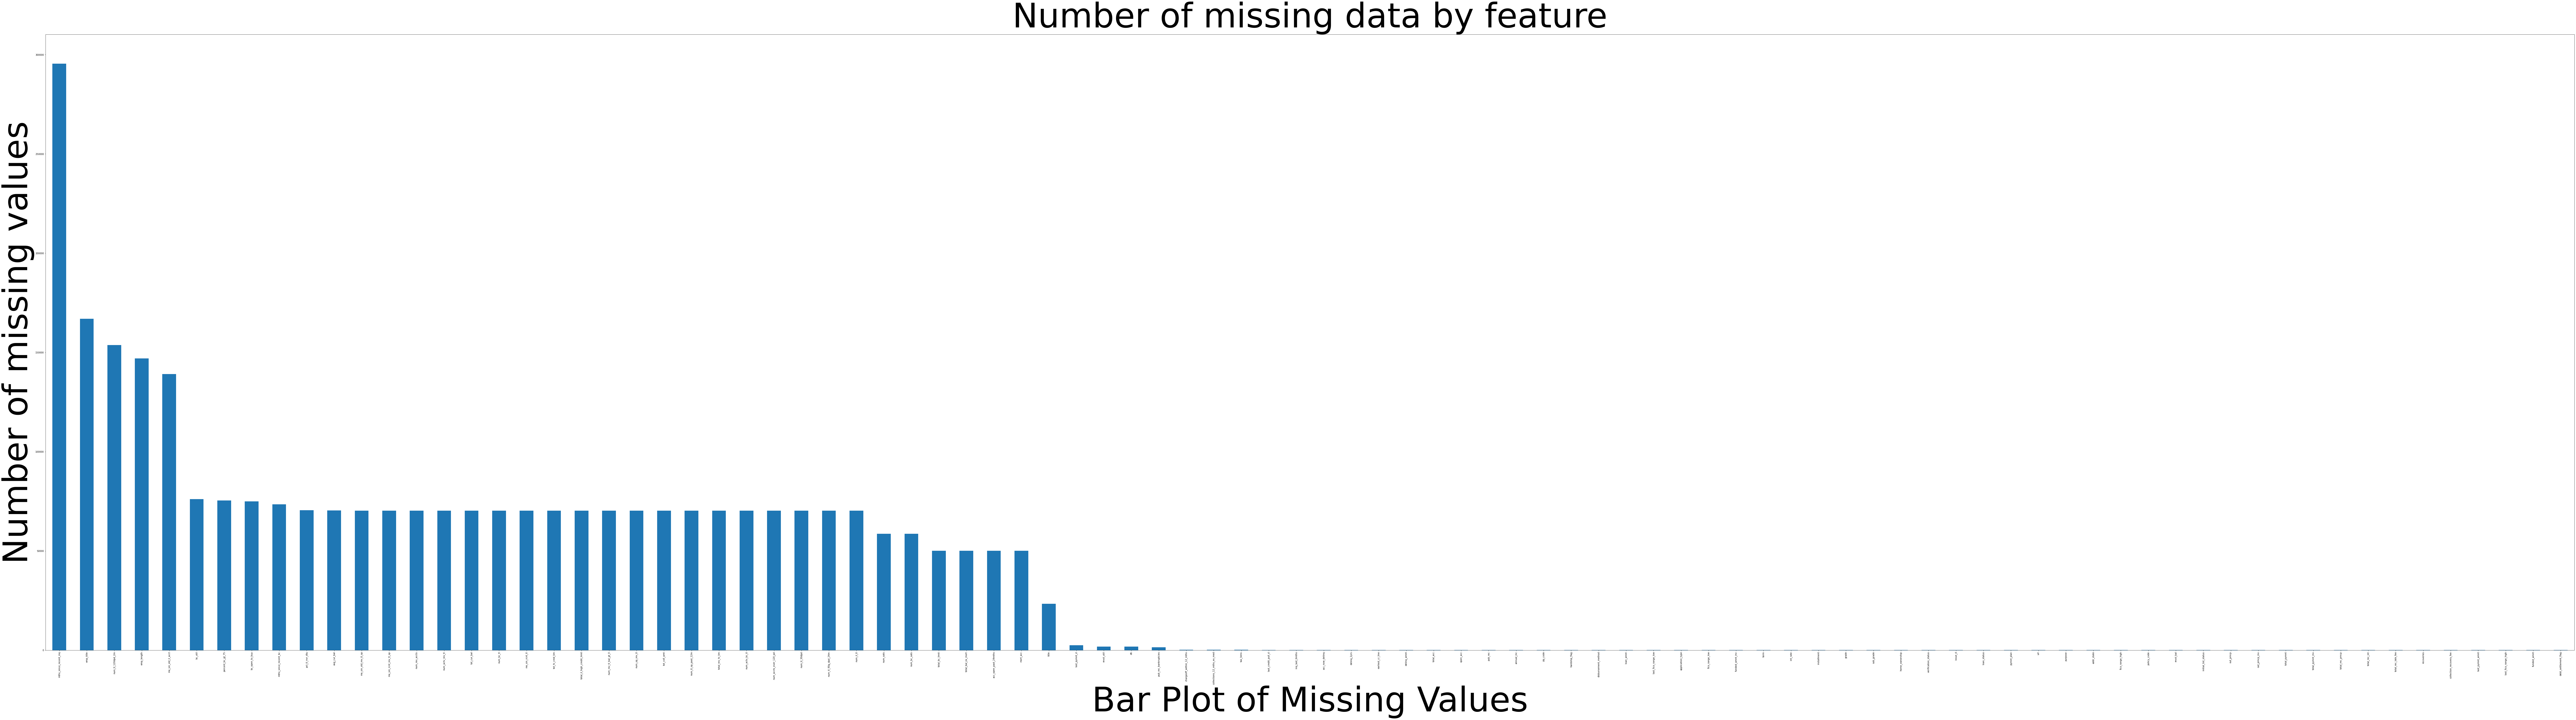

In [24]:
plt.figure(figsize=(200,50))
missing= df_accepted.isnull().sum()
missing= missing[missing > 0]
missing.sort_values(ascending= False, inplace=True)
plt.xlabel("Bar Plot of Missing Values", fontsize=150)
plt.ylabel("Number of missing values", fontsize=150)
plt.title("Number of missing data by feature", fontsize=150)
missing.plot(kind="bar")
plt.show()


### Now we exclude those columns that are irrelevant for us.

In [26]:
drop_attributes = ['id', 'funded_amnt', 'funded_amnt_inv', 'verification_status', 'issue_d', 'pymnt_plan', 'url', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'last_credit_pull_d', 'policy_code', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 'hardship_flag']
len(drop_attributes)

60

There are 60 columns that we do not need

In [29]:
#code to drop the unwanted attributes
pd.options.mode.chained_assignment = None
df_accepted.drop(labels=drop_attributes, axis=1, inplace=True)

In [30]:
df_accepted.shape

(2260701, 33)

## Loan status
**Now we will analyse the loan status.
    we analyse two categories for loan_status i.e 'Fully_paid' and 'Charged_off (defaulters)" to predict the risk of loan
    repayment for the lending club.

In [31]:
df_accepted['loan_status'].unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default', nan,
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [32]:
df_accepted['loan_status'].value_counts(dropna=False)

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
NaN                                                         33
Name: loan_status, dtype: int64

In [33]:
# We only want values for "Fully Paid" and "Charged Off"
df_accepted = df_accepted.loc[df_accepted['loan_status'].isin(['Fully Paid', 'Charged Off'])]

In [38]:
loan=df_accepted['loan_status'].value_counts(dropna=False)

In [36]:
df_accepted.shape

(1345310, 33)

C:\Users\hhhty\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Frequency Distribuition- Loan Amount')

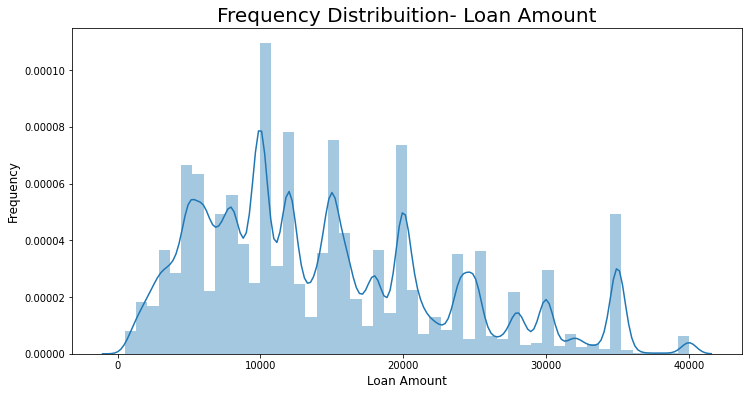

In [53]:
# Frequency distribution of Loan Amount
plt.figure(figsize=(12,6))
g = sbn.distplot(df_accepted["loan_amnt"])
g.set_xlabel("Loan Amount", fontsize=12)
g.set_ylabel("Frequency", fontsize=12)
g.set_title("Frequency Distribuition- Loan Amount", fontsize=20)

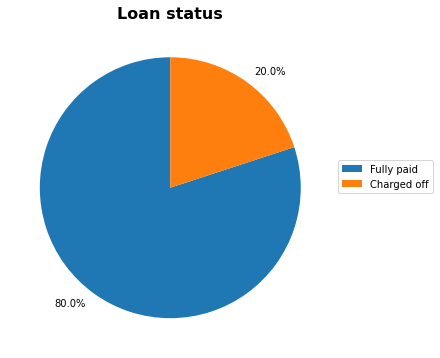

In [37]:
chargeoffrate = df_accepted['loan_status'].value_counts(normalize=True,dropna=False)
#creating the labels for the chart:
labels = []
for i in chargeoffrate:
    labels.append(str(round(i*100,0))+"%")

# Creating the pie chart
plt.figure(figsize=(12,6))
plt.title('Loan status', fontsize=16, fontweight='bold');
plt.pie(chargeoffrate,labels=labels,startangle=90);
plt.legend(['Fully paid','Charged off'], loc='best', bbox_to_anchor=(1, 0.6));

Text(0.5, 0, 'Count')

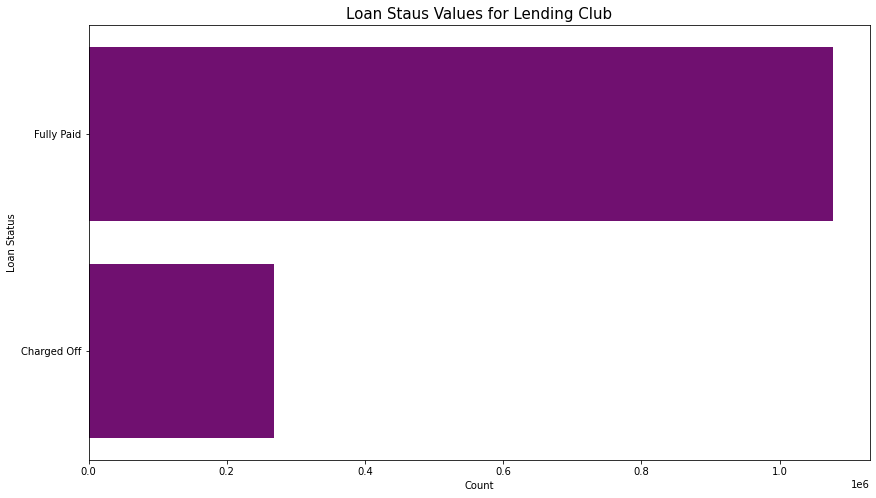

In [41]:
plt.figure(figsize=(14,8))
sbn.barplot(y = loan.index, x = loan,color = 'purple')
plt.title('Loan Staus Values for Lending Club',fontsize=15)
plt.ylabel('Loan Status', fontsize=10)
plt.xlabel('Count',fontsize=10)

In [66]:
df_accepted["loan_amnt"].describe()


count    1.345310e+06
mean     1.441997e+04
std      8.717051e+03
min      5.000000e+02
25%      8.000000e+03
50%      1.200000e+04
75%      2.000000e+04
max      4.000000e+04
Name: loan_amnt, dtype: float64

In [ ]:
We observe lending club have not provided loan more than 40000 dollars.

In [70]:
df_accepted["loan_status"][df_accepted["loan_amnt"]>40000].value_counts()

Series([], Name: loan_status, dtype: int64)

In [71]:
pd.pivot_table(df_accepted, index='loan_status', aggfunc='mean')

,acc_now_delinq,annual_inc,chargeoff_within_12_mths,collection_recovery_fee,collections_12_mths_ex_med,dti,fico_range_high,fico_range_low,installment,int_rate,last_fico_range_high,last_fico_range_low,last_pymnt_amnt,loan_amnt,pub_rec,recoveries
loan_status,,,,,,,,,,,,,,,,
Charged Off,0.005656,70400.743283,0.009760,201.526243,0.021850,20.171196,691.850171,687.850119,465.147994,15.710714,568.443236,507.111752,472.420366,15565.055444,0.246843,1209.456926
Fully Paid,0.004893,77705.945505,0.008888,0.000000,0.015957,17.811629,702.264062,698.263902,431.323226,12.623288,704.433473,698.336245,6658.467296,14134.369808,0.207403,0.000000


In [73]:
df_accepted.shape

(1345310, 33)

## Grade

In [42]:
df_accepted['grade'].unique()

array(['C', 'B', 'F', 'A', 'E', 'D', 'G'], dtype=object)

In [58]:
np.sort(df_accepted['sub_grade'].unique())

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

In [50]:
df_accepted.head().T

,0,1,2,4,5
loan_amnt,3600.0,24700.0,20000.0,10400.0,11950.0
term,36 months,36 months,60 months,60 months,36 months
int_rate,13.99,11.99,10.78,22.45,13.44
installment,123.03,820.28,432.66,289.91,405.18
grade,C,C,B,F,C
sub_grade,C4,C1,B4,F1,C3
emp_title,leadman,Engineer,truck driver,Contract Specialist,Veterinary Tecnician
emp_length,10+ years,10+ years,10+ years,3 years,4 years
home_ownership,MORTGAGE,MORTGAGE,MORTGAGE,MORTGAGE,RENT
annual_inc,55000.0,65000.0,63000.0,104433.0,34000.0


In [51]:
df_accepted["sub_grade"].value_counts()

C1    85494
B4    83199
B5    82538
B3    81827
C2    79213
C3    74998
C4    74421
B2    74024
B1    71153
C5    67560
A5    64003
A4    52235
D1    51321
D2    44848
A1    43678
D3    39317
A3    37996
A2    37178
D4    35566
D5    29901
E1    23749
E2    21377
E3    18387
E4    15720
E5    14417
F1     9970
F2     7198
F3     6088
F4     4859
F5     3943
G1     2997
G2     2131
G3     1614
G4     1280
G5     1110
Name: sub_grade, dtype: int64

Text(0.5, 0, 'Count')

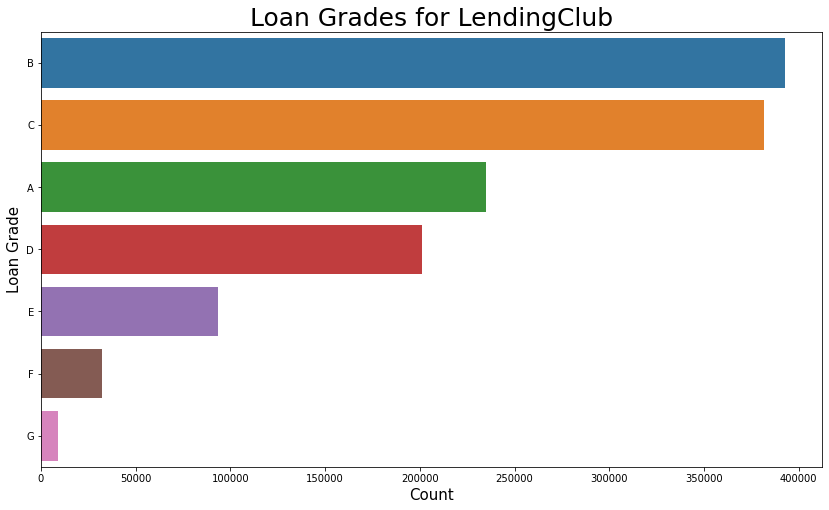

In [61]:
# Set a new variable for the purpose of displaying the value counts of 'grade'
grade_vis = df_accepted['grade'].value_counts()

# Plot the value counts
plt.figure(figsize=(14,8))

sbn.barplot(y=grade_vis.index, x=grade_vis)
plt.title('Loan Grades for LendingClub', fontsize=25)
plt.ylabel('Loan Grade', fontsize=15)
plt.xlabel('Count', fontsize=15)

### Interest rate for customers

In [63]:
df_accepted["int_rate"].describe()


count    1.345310e+06
mean     1.323962e+01
std      4.768716e+00
min      5.310000e+00
25%      9.750000e+00
50%      1.274000e+01
75%      1.599000e+01
max      3.099000e+01
Name: int_rate, dtype: float64

In [75]:
df_accepted["int_rate"].describe()

count    1.345310e+06
mean     1.323962e+01
std      4.768716e+00
min      5.310000e+00
25%      9.750000e+00
50%      1.274000e+01
75%      1.599000e+01
max      3.099000e+01
Name: int_rate, dtype: float64

In [77]:
pd.pivot_table(df_accepted, index='loan_status', values="int_rate", aggfunc='mean')


,int_rate
loan_status,
Charged Off,15.710714
Fully Paid,12.623288


From above we observe that charged off customers have to paymore interset than the fully paid customers

In [78]:
#comparing avg interest rate with the grade for customers
pd.pivot_table(df_accepted, index='loan_status',columns="grade", values="int_rate", aggfunc='mean')

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,7.388816,10.789292,14.078851,17.790391,21.201009,25.099345,27.946425
Fully Paid,7.095310,10.662105,14.004565,17.691605,21.098731,24.799040,27.506030


In [82]:
X1 = df_accepted.groupby(["grade"])["int_rate"].mean().index
Y1 = df_accepted.groupby(["grade"])["int_rate"].mean().values

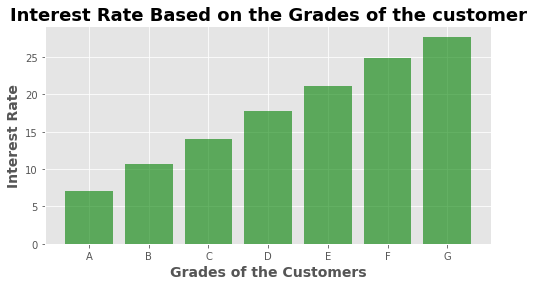

In [83]:
plt.style.use('ggplot')
f, ax = plt.subplots(figsize=(8,4))
plt.bar(X1, Y1, color='green', alpha=0.60)
plt.title('Interest Rate Based on the Grades of the customer',fontsize=18, fontweight='bold')
plt.xlabel("Grades of the Customers", fontsize=14.0, fontweight='bold')
plt.ylabel("Interest Rate", fontsize=14.0, fontweight='bold')
plt.show()

In [85]:
X2 = df_accepted.groupby(["sub_grade"])["int_rate"].mean().index
Y2 = df_accepted.groupby(["sub_grade"])["int_rate"].mean().values

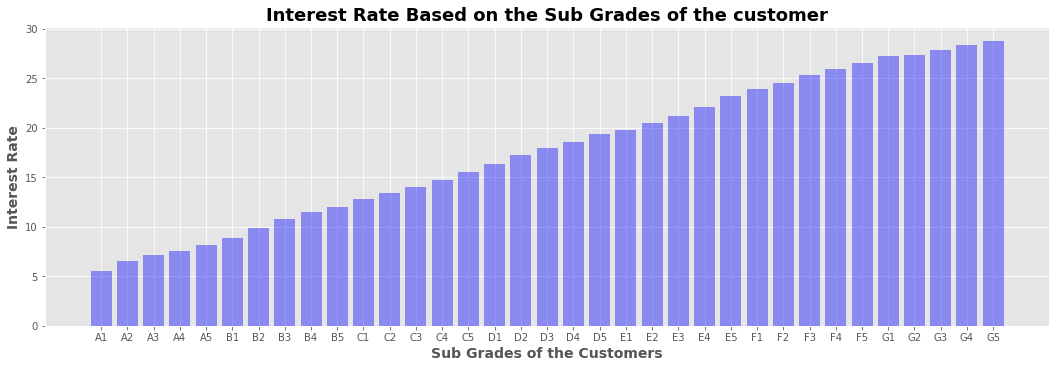

In [86]:
plt.style.use('ggplot')
f, ax = plt.subplots(figsize=(18,5.5)) #set the size that you'd like (width, height)
plt.bar(X2, Y2, color='blue', alpha=0.40)
plt.title('Interest Rate Based on the Sub Grades of the customer',fontsize=18, fontweight='bold')
plt.xlabel("Sub Grades of the Customers", fontsize=14.0, fontweight='bold')
plt.ylabel("Interest Rate", fontsize=14.0, fontweight='bold')
plt.show()

C:\Users\hhhty\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


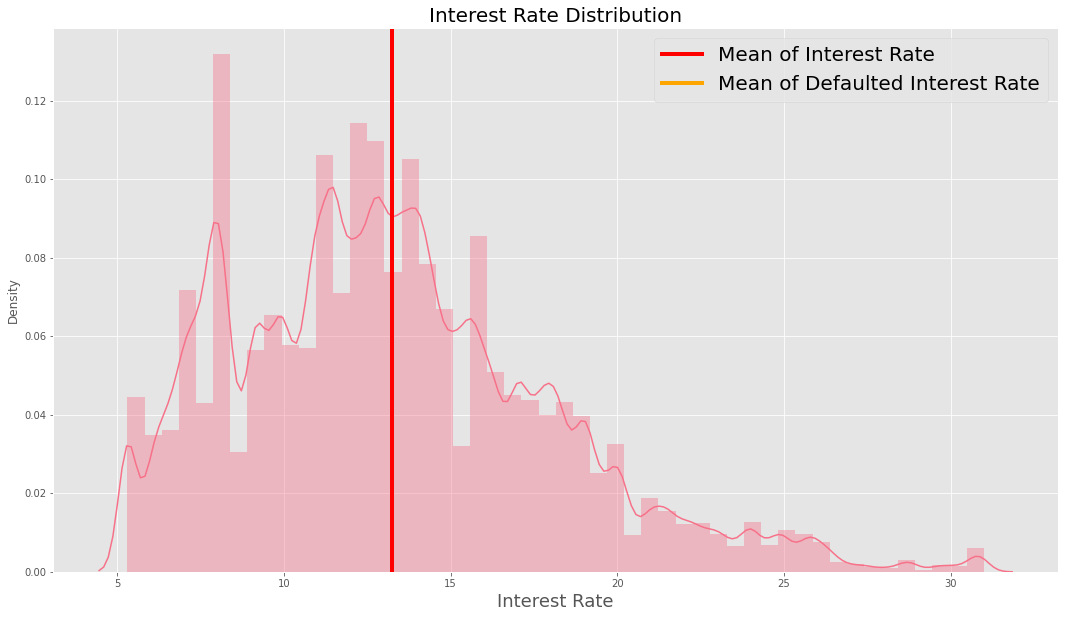

In [99]:

# Set new variable name to include only loans that are defaulted
default_vis = df_accepted[df_accepted.loan_status == 'Default']

# Visualize the distribution of interest rates
sbn.set_palette("husl")
plt.figure(figsize=(18,10))
sbn.distplot(df_accepted['int_rate'], hist='density')
plt.axvline(x=df_accepted.int_rate.mean(), color='red', linestyle='-', lw=4, label='Mean of Interest Rate')
plt.axvline(x=default_vis.int_rate.mean(), color='orange', linestyle='-', lw=4, label='Mean of Defaulted Interest Rate')
plt.title('Interest Rate Distribution', fontsize=20)
plt.xlabel('Interest Rate', fontsize=18)
plt.legend(fontsize=20)
plt.show()

**outliner detection using inter quartile range

In [79]:


Q1 = np.quantile(df_accepted["int_rate"],0.25)
Q3 = np.quantile(df_accepted["int_rate"],0.75)
IQR = Q3 - Q1

Low_outliers = Q1-1.5*IQR
High_outliers = Q3+1.5*IQR

print("Low_outliers :", round(Low_outliers,4))
print("High_outliers :", round(High_outliers,4))

print("Q1 :",Q1)
print("Q3 :", Q3)
print("IQR :", IQR)

Low_outliers : 0.39
High_outliers : 25.35
Q1 : 9.75
Q3 : 15.99
IQR : 6.24


### Employment length

In [87]:
df_accepted['emp_length'].unique()

array(['10+ years', '3 years', '4 years', '6 years', '7 years', '8 years',
       '2 years', '5 years', '9 years', '< 1 year', '1 year', nan],
      dtype=object)

In [ ]:
NOTE : We need integer values for years Therefore we need to replace the values here.

In [88]:
df_accepted['emp_length'].replace(to_replace=['10+ years', '3 years', '4 years', '6 years', '7 years', '8 years', '2 years', '5 years', '9 years', '< 1 year', '1 year'], value=[10,3,4,6,7,8,2,5,9,0,1], inplace=True)


In [89]:
df_accepted['emp_length'].value_counts()


10.0    442199
2.0     121743
0.0     108061
3.0     107597
1.0      88494
5.0      84154
4.0      80556
6.0      62733
8.0      60701
7.0      59624
9.0      50937
Name: emp_length, dtype: int64

In [90]:
df_accepted['emp_length'].isnull().sum()


78511

In [91]:
df_accepted['emp_length'].mean()


5.965873039053552

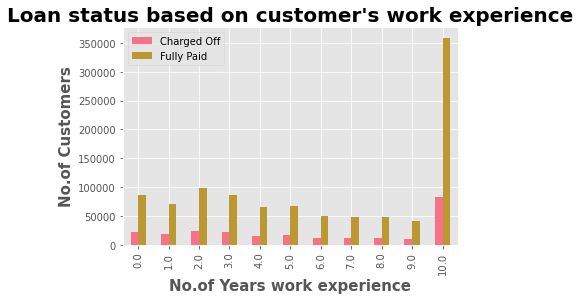

In [101]:
pd.crosstab(df_accepted["emp_length"],[df_accepted["loan_status"]]).plot(kind="bar")
plt.title("Loan status based on customer's work experience", fontsize=20.0, fontweight='bold')
plt.xlabel("No.of Years work experience", fontsize=15.0, fontweight='bold')
plt.ylabel("No.of Customers", fontsize=15, fontweight='bold')
plt.legend(loc="best")
plt.show()

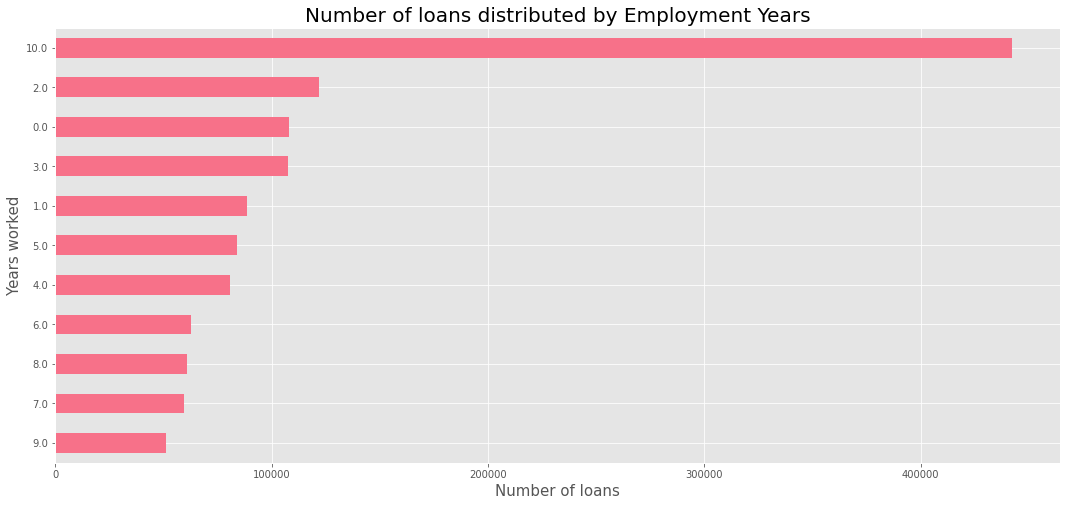

In [102]:
# Employment Length and Number of Loans
df_accepted['emp_length'].value_counts().sort_values().plot(kind='barh',figsize=(18,8))
plt.title('Number of loans distributed by Employment Years',fontsize=20)
plt.xlabel('Number of loans',fontsize=15)
plt.ylabel('Years worked',fontsize=15);

### Installments


C:\Users\hhhty\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


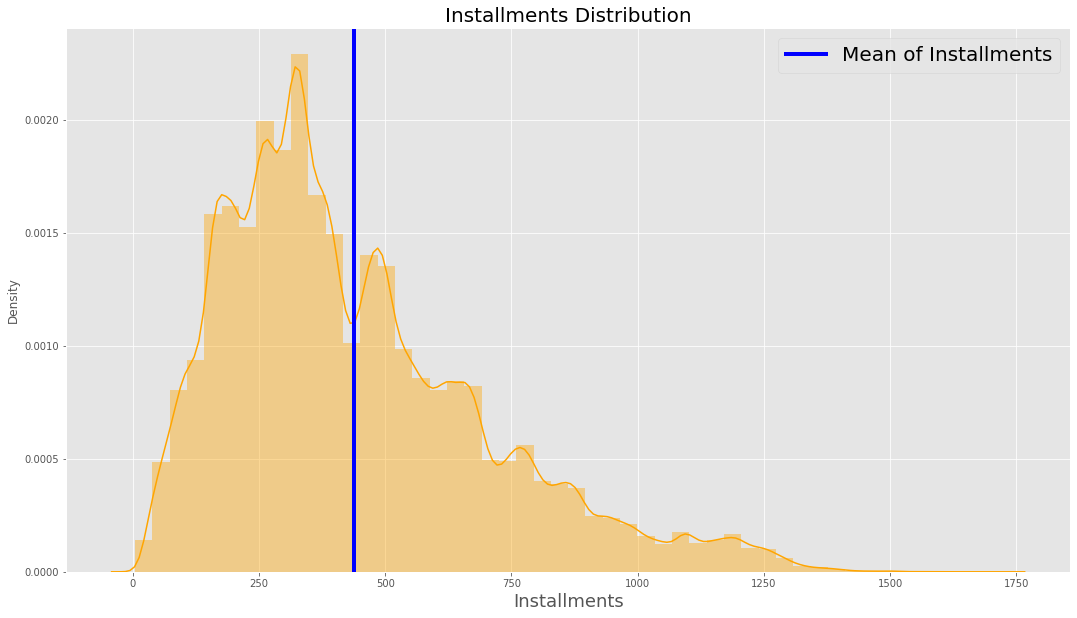

In [125]:
sbn.set_palette("husl")
plt.figure(figsize=(18,10))
sbn.distplot(df_accepted['installment'], hist='density', color='orange')
plt.axvline(x=df_accepted.installment.mean(), color='blue', linestyle='-', lw=4, label='Mean of Installments')
plt.title('Installments Distribution', fontsize=20)
plt.xlabel('Installments', fontsize=18)
plt.legend(fontsize=20)
plt.show()

### Home ownership

In [126]:
df_accepted["home_ownership"].unique()

array(['MORTGAGE', 'RENT', 'OWN', 'ANY', 'NONE', 'OTHER'], dtype=object)

In [127]:
df_accepted["home_ownership"].value_counts()


MORTGAGE    665579
RENT        534421
OWN         144832
ANY            286
OTHER          144
NONE            48
Name: home_ownership, dtype: int64

In [131]:

X1 = df_accepted["home_ownership"].value_counts().index
Y1 = df_accepted["home_ownership"].value_counts().values
print(X1)
print(Y1)

Index(['MORTGAGE', 'RENT', 'OWN', 'ANY', 'OTHER', 'NONE'], dtype='object')
[665579 534421 144832    286    144     48]


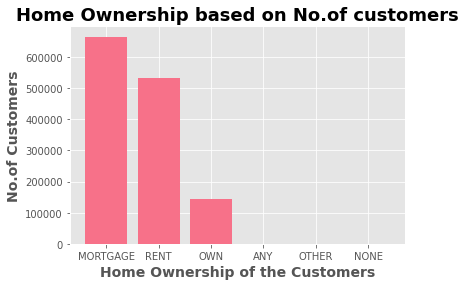

In [132]:
plt.bar(X1, Y1)
plt.title('Home Ownership based on No.of customers',fontsize=18, fontweight='bold')
plt.xlabel("Home Ownership of the Customers", fontsize=14.0, fontweight='bold')
plt.ylabel("No.of Customers", fontsize=14.0, fontweight='bold')
plt.show()


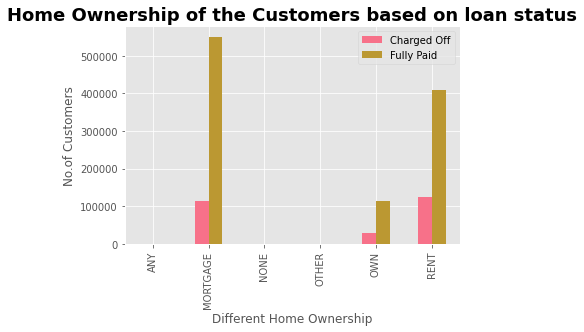

In [135]:
pd.crosstab(df_accepted["home_ownership"], df_accepted["loan_status"]).plot(kind="bar")
plt.title("Home Ownership of the Customers based on loan status", fontsize=18.0, fontweight='bold')
plt.xlabel("Different Home Ownership")
plt.ylabel("No.of Customers")
plt.legend(loc="best")
plt.show()

### Annual income

In [137]:
df_accepted['annual_inc'].describe()

count    1.345310e+06
mean     7.624764e+04
std      6.992510e+04
min      0.000000e+00
25%      4.578000e+04
50%      6.500000e+04
75%      9.000000e+04
max      1.099920e+07
Name: annual_inc, dtype: float64

In [140]:
df_accepted['log_annual_inc'] = df_accepted['annual_inc'].apply(lambda x: np.log10(x+1))


In [141]:
df_accepted['log_annual_inc'].describe()


count    1.345310e+06
mean     4.812814e+00
std      2.477200e-01
min      0.000000e+00
25%      4.660685e+00
50%      4.812920e+00
75%      4.954247e+00
max      7.041361e+00
Name: log_annual_inc, dtype: float64

Text(0.5, 0, 'log_annual_inc')

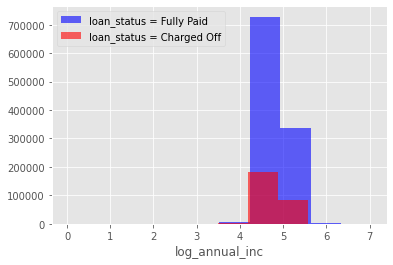

In [144]:
plt.subplot(1, 1, 1)
df_accepted[df_accepted["loan_status"] == "Fully Paid"]["log_annual_inc"].hist(bins=10, color='blue', label='loan_status = Fully Paid', alpha=0.6)
df_accepted[df_accepted["loan_status"] == "Charged Off"]["log_annual_inc"].hist(bins=10, color='red', label='loan_status = Charged Off', alpha=0.6)
plt.legend()
plt.xlabel("log_annual_inc")

In [146]:
df_accepted.groupby('loan_status')['log_annual_inc'].describe()


,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,268559.0,4.781756,0.241984,0.0,4.633479,4.778158,4.929424,6.977724
Fully Paid,1076751.0,4.820560,0.248526,0.0,4.672107,4.812920,4.968488,7.041361


In [147]:
plot_var('earliest_cr_line', 'Year of Earliest Credit Line', continuous=True)


NameError: name 'plot_var' is not defined

### Other variables like zip code, issue date , purpose etc

**purpose

In [148]:
df_accepted['purpose'].value_counts()


debt_consolidation    780321
credit_card           295279
home_improvement       87504
other                  77875
major_purchase         29425
medical                15554
small_business         15416
car                    14585
moving                  9480
vacation                9065
house                   7253
wedding                 2294
renewable_energy         933
educational              326
Name: purpose, dtype: int64

In [149]:
df_accepted.groupby('purpose')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off'].sort_values()


purpose
wedding               0.121622
car                   0.146795
credit_card           0.169270
educational           0.171779
home_improvement      0.177158
major_purchase        0.185998
vacation              0.191726
other                 0.210401
debt_consolidation    0.211469
medical               0.217757
house                 0.218806
moving                0.233544
renewable_energy      0.236870
small_business        0.297094
Name: loan_status, dtype: float64

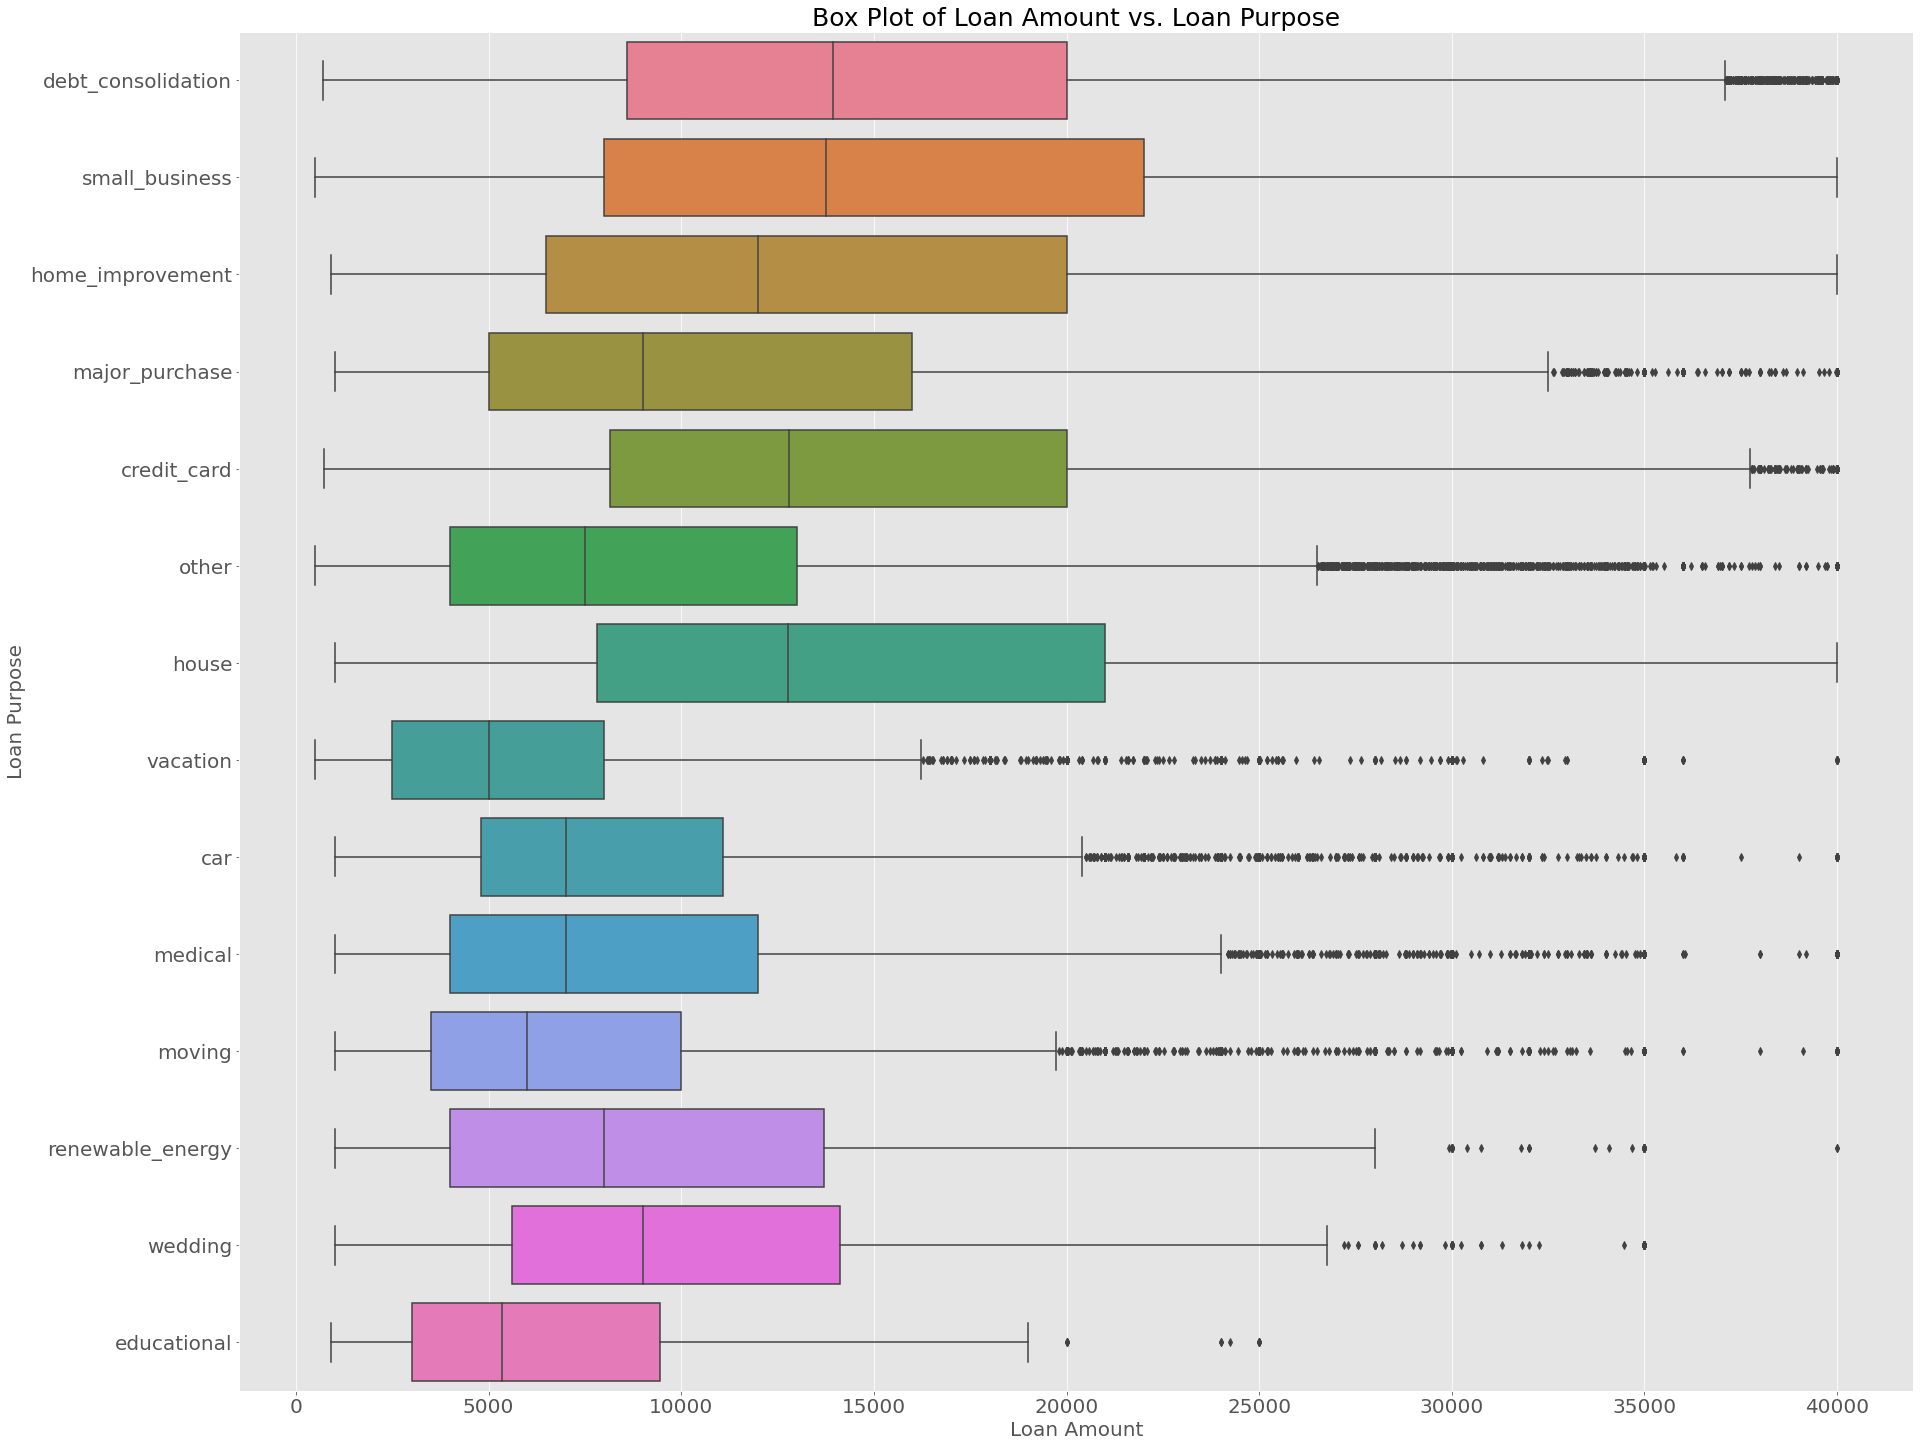

In [160]:
# Plot the borrower's Loan Amount compared to Loan Purpose
plt.figure(figsize=(30,25))
sbn.boxplot(x="loan_amnt", y="purpose", data=df_accepted, palette="husl")
plt.title('Box Plot of Loan Amount vs. Loan Purpose', fontsize=25)
plt.xlabel('Loan Amount', fontsize=20)
plt.ylabel('Loan Purpose', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

**debt to income ratio

In [150]:
df_accepted['dti'].describe()

count    1.344936e+06
mean     1.828267e+01
std      1.116045e+01
min     -1.000000e+00
25%      1.179000e+01
50%      1.761000e+01
75%      2.406000e+01
max      9.990000e+02
Name: dti, dtype: float64

In [151]:
df_accepted.dti.value_counts()

18.00     995
19.20     991
14.40     971
16.80     951
15.60     918
         ... 
64.72       1
57.24       1
114.90      1
66.71       1
55.82       1
Name: dti, Length: 7067, dtype: int64

C:\Users\hhhty\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Debt-to-income Ratio')

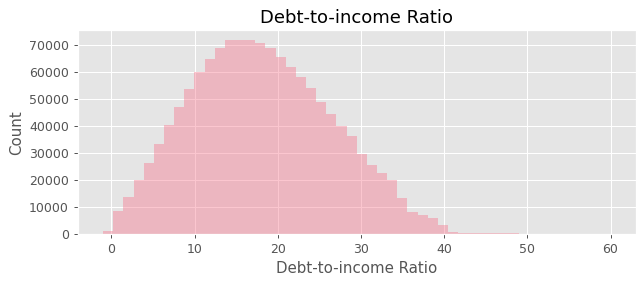

In [157]:

plt.figure(figsize=(8,3), dpi=90)
sbn.distplot(df_accepted.loc[df_accepted['dti'].notnull() & (df_accepted['dti']<60), 'dti'], kde=False)
plt.xlabel('Debt-to-income Ratio')
plt.ylabel('Count')
plt.title('Debt-to-income Ratio')

**More Preprocessing

In [4]:
df=data_accepted.copy()

In [6]:
#transform the loan-status into a binary variable where 'Charged Off' = 1 and 'Fully Paid' = 0.
df['loan_status_bin'] = df['loan_status'].map({'Charged Off': 1, 'Fully Paid': 0})

In [8]:
df['annual_inc_log'] = df['annual_inc'].apply(np.log)

## Model Building

In [9]:
#Reduce the dataset to the following columns that will be used for the prediction.

columns = ['loan_amnt', 'term', 'int_rate',
       'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc_log', 'verification_status',
       'loan_status_bin', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs',
       'fico_range_low', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc']
df = df[columns]

In [10]:
#Drop all rows with null values as we have sufficient amount of data
df.dropna(inplace=True)

<ipython-input-10-45345643fc64>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [11]:
df.shape

(1265975, 21)

In [12]:
#converting grade from string to numeric
df['grade']=df['grade'].map({'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7})

<ipython-input-12-120e89dc2c55>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grade']=df['grade'].map({'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7})


In [13]:
df_dummies = pd.get_dummies(df) #get dummy for categorical features

In [14]:
drop_columns = df_dummies.columns[(df_dummies.mean()<0.01)] #drop all dummy-variables which contain not at least 1% ones
df_dummies.drop(drop_columns, axis=1, inplace=True)

In [15]:
df_dummies.head()

,loan_amnt,int_rate,installment,grade,annual_inc_log,loan_status_bin,dti,delinq_2yrs,fico_range_low,inq_last_6mths,...,addr_state_NY,addr_state_OH,addr_state_OR,addr_state_PA,addr_state_SC,addr_state_TN,addr_state_TX,addr_state_VA,addr_state_WA,addr_state_WI
0,3600.0,13.99,123.03,3,10.915088,0.0,5.91,0.0,675.0,1.0,...,0,0,0,1,0,0,0,0,0,0
1,24700.0,11.99,820.28,3,11.082143,0.0,16.06,1.0,715.0,4.0,...,0,0,0,0,0,0,0,0,0,0
2,20000.0,10.78,432.66,2,11.050890,0.0,10.78,0.0,695.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,10400.0,22.45,289.91,6,11.556301,0.0,25.37,1.0,695.0,3.0,...,0,0,0,1,0,0,0,0,0,0
5,11950.0,13.44,405.18,3,10.434116,0.0,10.20,0.0,690.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
X = df_dummies.drop('loan_status_bin', axis=1)
y = df_dummies['loan_status_bin']

**Train and Test set

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

sc = MinMaxScaler()
clf = LogisticRegression(penalty='l1', C=0.01, solver='liblinear')

pipe_lr = Pipeline([('scaler', sc), ('clf', clf)])

In [19]:
pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('clf',
                 LogisticRegression(C=0.01, penalty='l1', solver='liblinear'))])

In [20]:
pipe_lr.score(X_train, y_train) #accuracy rate

0.8057297734947373

ROC-AUC-score:  0.7114910006212922


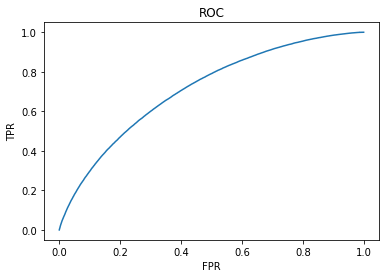

In [21]:
test_probas = pipe_lr.predict_proba(X_test)[:,1]
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

fpr, tpr, tresholds = roc_curve(y_test, test_probas)
plt.plot(fpr, tpr)
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')

print('ROC-AUC-score: ', roc_auc_score(y_test, test_probas))

In [22]:
#Testing with LR.score:

accuracy_score(y_test, pipe_lr.predict(X_test))

0.8059519342799029